In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import time

In [2]:
batch_size = 100#batch_size will be used to get accuracy
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train','test','validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train','test','validation']}

In [4]:
class ConvNet_L6_A(nn.Module):
    def __init__(self):
        super(ConvNet_L6_A, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [16]:
class ConvNet_L6_B(nn.Module):
    def __init__(self):
        super(ConvNet_L6_B, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,2000)
        self.fc2 = nn.Linear(2000,1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [6]:
class ConvNet_L6_C(nn.Module):
    def __init__(self):
        super(ConvNet_L6_C, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,512)
        self.fc2 = nn.Linear(512,100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [7]:
class ConvNet_L6_C_X(nn.Module):
    def __init__(self):
        super(ConvNet_L6_C_X, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [8]:
class ConvNet_L6_D(nn.Module):
    def __init__(self):
        super(ConvNet_L6_D, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,4000)
        self.fc2 = nn.Linear(4000,2048)
        self.fc3 = nn.Linear(2048, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [9]:
class ConvNet_L6_E(nn.Module):
    def __init__(self):
        super(ConvNet_L6_E, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [10]:
class ConvNet_L6_F(nn.Module):
    def __init__(self):
        super(ConvNet_L6_F, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x= self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [11]:
class ConvNet_L6_G(nn.Module):
    def __init__(self):
        super(ConvNet_L6_G, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)

        return F.log_softmax(x, dim = 1)

In [12]:
class ConvNet_L6_H(nn.Module):
    def __init__(self):
        super(ConvNet_L6_H, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,512)
        self.fc2 = nn.Linear(512,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [13]:
def AccuracyHelper(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction = torch.max(F.softmax(y_pred, dim = 1), 1)[1]
        pred_y = prediction.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        count += sum(pred_y == target_y)
    print('accuracy on this tset: {}%'.format(100*float(count)/float(batch_size*len(dataset))),count)

In [14]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.01, epoch = 30):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.all_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))

In [17]:
model_l6_a = ConvNet_L6_A()
model_l6_a.cuda()
model_l6_b = ConvNet_L6_B()
model_l6_b.cuda()
model_l6_c = ConvNet_L6_C()
model_l6_c.cuda()
model_l6_c_x = ConvNet_L6_C_X()
model_l6_c_x.cuda()
model_l6_d = ConvNet_L6_D()
model_l6_d.cuda()
model_l6_e = ConvNet_L6_E()
model_l6_e.cuda()
model_l6_f = ConvNet_L6_F()
model_l6_f.cuda()
model_l6_g = ConvNet_L6_G()
model_l6_g.cuda()
model_l6_h = ConvNet_L6_H()
model_l6_h.cuda()

ConvNet_L6_H(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=100, bias=True)
)

In [18]:
start_time = time.time()
train = Training(dataloaders, model_l6_a,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_a, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.606036	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.601077	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.601799	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.602829	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.603555	Accuracy: 0.020
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.599816	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.601614	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.600797	Accuracy: 0.030
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.610718	Accuracy: 0.020
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.596076	Accuracy: 0.050
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.599267	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.592954	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.590035	Accuracy: 0.020
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.585933	Accuracy: 0.020
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.739670	Accuracy: 0.780
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.672149	Accuracy: 0.850
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.803340	Accuracy: 0.820
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.869647	Accuracy: 0.800
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.787806	Accuracy: 0.800
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.822077	Accuracy: 0.760
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.649962	Accuracy: 0.810
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.749884	Accuracy: 0.810
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.812812	Accuracy: 0.810
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.900965	Accuracy: 0.770
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.612835	Accuracy: 0.850
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.637966	Accuracy: 0.790
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.722810	Accuracy: 0.830
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 0.876581	Accuracy: 0.800
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.081094	Accuracy: 0.980
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.113241	Accuracy: 0.980
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.061588	Accuracy: 0.990
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.241809	Accuracy: 0.940
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.179879	Accuracy: 0.960
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.118740	Accuracy: 0.970
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.093801	Accuracy: 0.970
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.135475	Accuracy: 0.960
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.215190	Accuracy: 0.940
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.077526	Accuracy: 0.960
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.094702	Accuracy: 0.970
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.140863	Accuracy: 0.970
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.069226	Accuracy: 0.980
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.249928	Accuracy: 0.970
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.036425	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.025192	Accuracy: 0.990
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.040584	Accuracy: 1.000
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.037337	Accuracy: 0.990
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.034929	Accuracy: 0.980
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.048994	Accuracy: 0.990
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.055111	Accuracy: 0.980
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.058460	Accuracy: 0.990
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.052622	Accuracy: 0.980
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.054998	Accuracy: 0.960
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.065505	Accuracy: 0.980
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.019404	Accuracy: 1.000
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.025642	Accuracy: 1.000
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.057613	Accuracy: 0.980
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.027667	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.004552	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.066945	Accuracy: 0.960
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.057377	Accuracy: 0.970
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.017783	Accuracy: 1.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.032105	Accuracy: 0.990
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.008512	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.022339	Accuracy: 0.990
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.003908	Accuracy: 1.000
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.214717	Accuracy: 0.970
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.025330	Accuracy: 0.990
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.137803	Accuracy: 0.960
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.135634	Accuracy: 0.960
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.007440	Accuracy: 1.000
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.014563	Accuracy: 0.990
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.024101	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.017108	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.012764	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.108172	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.002220	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.009965	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.024735	Accuracy: 0.980
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.001341	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.014936	Accuracy: 0.990
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.008875	Accuracy: 1.000
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.002786	Accuracy: 1.000
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.044581	Accuracy: 0.980
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.016595	Accuracy: 1.000
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.001376	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.000538	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.010762	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.007202	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.001373	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.001710	Accuracy: 1.000
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.000530	Accuracy: 1.000
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.010495	Accuracy: 1.000
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.077011	Accuracy: 0.980
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.002331	Accuracy: 1.000
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.051044	Accuracy: 0.990
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.028283	Accuracy: 0.990
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.023571	Accuracy: 0.990
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.005268	Accuracy: 1.000
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.003209	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.026876	Accuracy: 0.990
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.005183	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.001675	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.000331	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.000124	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.000518	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.000346	Accuracy: 1.000
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.000146	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.001525	Accuracy: 1.000
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.000540	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.000052	Accuracy: 1.000
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.000579	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.001080	Accuracy: 1.000
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000422	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000438	Accuracy: 1.000
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.021634	Accuracy: 0.990
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.000641	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.000201	Accuracy: 1.000
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.000204	Accuracy: 1.000
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.000483	Accuracy: 1.000
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.000536	Accuracy: 1.000
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.001362	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.000284	Accuracy: 1.000
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.000319	Accuracy: 1.000
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.000144	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.000124	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.000312	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.000114	Accuracy: 1.000
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.000404	Accuracy: 1.000
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.000095	Accuracy: 1.000
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.000089	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.000128	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.000108	Accuracy: 1.000
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.000634	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.000187	Accuracy: 1.000
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.000099	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.000719	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.000189	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.000154	Accuracy: 1.000
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.000218	Accuracy: 1.000
Train Epoch: 28 [60

In [19]:
start_time = time.time()
train = Training(dataloaders, model_l6_b,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_b, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.610551	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.608614	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.605803	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.607983	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.608223	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.606774	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.601211	Accuracy: 0.020
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.606511	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.607565	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.602869	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.605635	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.606994	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605250	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.604433	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 2.617347	Accuracy: 0.300
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 2.785212	Accuracy: 0.290
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 2.786229	Accuracy: 0.300
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 2.624974	Accuracy: 0.360
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 2.548908	Accuracy: 0.400
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 2.574548	Accuracy: 0.370
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 2.252635	Accuracy: 0.450
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 2.452170	Accuracy: 0.320
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 2.520627	Accuracy: 0.370
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 2.098567	Accuracy: 0.450
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 2.336925	Accuracy: 0.400
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 2.353279	Accuracy: 0.380
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.999354	Accuracy: 0.520
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 2.484148	Accuracy: 0.380
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.536375	Accuracy: 0.880
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.601849	Accuracy: 0.810
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.422429	Accuracy: 0.840
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.519485	Accuracy: 0.870
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.331870	Accuracy: 0.920
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.700609	Accuracy: 0.830
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.353890	Accuracy: 0.920
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.504575	Accuracy: 0.870
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.613450	Accuracy: 0.840
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.533796	Accuracy: 0.880
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.631284	Accuracy: 0.830
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.501289	Accuracy: 0.820
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.530686	Accuracy: 0.860
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.564657	Accuracy: 0.810
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.133065	Accuracy: 0.960
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.071288	Accuracy: 0.980
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.061339	Accuracy: 0.980
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.091804	Accuracy: 0.980
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.109000	Accuracy: 0.960
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.251196	Accuracy: 0.940
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.219150	Accuracy: 0.920
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.226509	Accuracy: 0.930
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.215751	Accuracy: 0.930
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.121793	Accuracy: 0.940
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.128478	Accuracy: 0.980
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.220676	Accuracy: 0.950
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.082809	Accuracy: 0.980
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.148644	Accuracy: 0.970
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.048585	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.016313	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.027623	Accuracy: 1.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.011237	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.074201	Accuracy: 0.960
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.048314	Accuracy: 0.980
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.049024	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.048584	Accuracy: 0.990
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.143338	Accuracy: 0.960
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.103627	Accuracy: 0.990
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.022424	Accuracy: 1.000
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.073852	Accuracy: 0.970
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.101566	Accuracy: 0.970
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.020707	Accuracy: 1.000
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.053410	Accuracy: 0.980
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.032344	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.152718	Accuracy: 0.970
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.004684	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.012330	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.050765	Accuracy: 0.990
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.016438	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.057542	Accuracy: 0.990
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.011532	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.021781	Accuracy: 0.990
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.035305	Accuracy: 0.980
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.028347	Accuracy: 0.990
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.025621	Accuracy: 0.990
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.062617	Accuracy: 0.980
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.025792	Accuracy: 0.990
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.053532	Accuracy: 0.990
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.012457	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.004682	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.003152	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.009738	Accuracy: 0.990
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.000689	Accuracy: 1.000
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.027252	Accuracy: 0.990
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.009070	Accuracy: 1.000
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.008294	Accuracy: 1.000
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.027180	Accuracy: 0.990
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.011599	Accuracy: 0.990
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.087208	Accuracy: 0.990
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.008451	Accuracy: 1.000
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.024824	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.015455	Accuracy: 0.990
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.002455	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.007527	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.012891	Accuracy: 0.990
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.003528	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.000811	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.026840	Accuracy: 0.990
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.000892	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.014817	Accuracy: 0.990
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.004355	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.005608	Accuracy: 1.000
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.001264	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.028628	Accuracy: 0.990
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.039087	Accuracy: 0.990
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.006955	Accuracy: 1.000
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.002767	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.004912	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.001886	Accuracy: 1.000
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.000362	Accuracy: 1.000
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.037653	Accuracy: 0.990
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.008129	Accuracy: 1.000
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.105213	Accuracy: 0.990
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.058515	Accuracy: 0.980
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.005202	Accuracy: 1.000
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.001536	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.005549	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.000685	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.009857	Accuracy: 0.990
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.001558	Accuracy: 1.000
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.000137	Accuracy: 1.000
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.000263	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.003949	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.001807	Accuracy: 1.000
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.001090	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.001240	Accuracy: 1.000
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.000253	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.000589	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.000384	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.000451	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.000189	Accuracy: 1.000
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.001807	Accuracy: 1.000
Train Epoch: 28 [60

In [35]:
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_b, dataloaders['test'])

--- 2.86102294921875e-05 seconds ---
-Model performance on test-set: 
accuracy on this tset: 76.8% 768


In [20]:
start_time = time.time()
train = Training(dataloaders, model_l6_c,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_c, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.601116	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.596824	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.611692	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.602776	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.595428	Accuracy: 0.040
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.586401	Accuracy: 0.030
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.605484	Accuracy: 0.020
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.592247	Accuracy: 0.040
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.567264	Accuracy: 0.030
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.575259	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.560968	Accuracy: 0.030
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.522190	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.559794	Accuracy: 0.030
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.540304	Accuracy: 0.020
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.461670	Accuracy: 0.890
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.525967	Accuracy: 0.870
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.275440	Accuracy: 0.900
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.280217	Accuracy: 0.890
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.354745	Accuracy: 0.910
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.400153	Accuracy: 0.870
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.354576	Accuracy: 0.920
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.460634	Accuracy: 0.860
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.436681	Accuracy: 0.900
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.330334	Accuracy: 0.910
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.339153	Accuracy: 0.890
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.425934	Accuracy: 0.860
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.373515	Accuracy: 0.890
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 0.377666	Accuracy: 0.880
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.115051	Accuracy: 0.960
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.052226	Accuracy: 1.000
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.013523	Accuracy: 1.000
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.102516	Accuracy: 0.970
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.034052	Accuracy: 0.980
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.145300	Accuracy: 0.960
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.048561	Accuracy: 0.990
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.048624	Accuracy: 0.980
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.043451	Accuracy: 0.990
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.045344	Accuracy: 0.970
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.066559	Accuracy: 0.970
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.073775	Accuracy: 0.980
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.068389	Accuracy: 0.950
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.254644	Accuracy: 0.940
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.041846	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.008165	Accuracy: 1.000
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.057804	Accuracy: 0.980
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.013179	Accuracy: 1.000
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.034616	Accuracy: 0.990
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.052749	Accuracy: 0.990
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.003562	Accuracy: 1.000
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.065518	Accuracy: 0.970
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.006248	Accuracy: 1.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.060645	Accuracy: 0.980
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.027974	Accuracy: 0.990
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.034140	Accuracy: 0.990
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.025233	Accuracy: 0.990
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.027547	Accuracy: 1.000
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.000931	Accuracy: 1.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.011344	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.020944	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.021277	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.026528	Accuracy: 0.980
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.010571	Accuracy: 1.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.077143	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.010423	Accuracy: 0.990
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.015996	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.050625	Accuracy: 0.980
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.000652	Accuracy: 1.000
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.001761	Accuracy: 1.000
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.023022	Accuracy: 0.990
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.008313	Accuracy: 1.000
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.005915	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.002270	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.018209	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.002249	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.066771	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.002421	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.000717	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.000976	Accuracy: 1.000
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.001002	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.005318	Accuracy: 1.000
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.036086	Accuracy: 1.000
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.001747	Accuracy: 1.000
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.024111	Accuracy: 0.990
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.051006	Accuracy: 0.990
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.000067	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.000916	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.000370	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.001896	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.000201	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.000063	Accuracy: 1.000
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.000331	Accuracy: 1.000
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.000085	Accuracy: 1.000
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.000067	Accuracy: 1.000
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.000067	Accuracy: 1.000
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.000393	Accuracy: 1.000
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.000117	Accuracy: 1.000
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.000110	Accuracy: 1.000
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.000054	Accuracy: 1.000
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.000082	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.000091	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.000186	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.000089	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.000048	Accuracy: 1.000
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.043484	Accuracy: 0.990
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.000020	Accuracy: 1.000
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.000053	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.000049	Accuracy: 1.000
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.000070	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.033499	Accuracy: 0.990
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 28 [60

In [21]:
start_time = time.time()
train = Training(dataloaders, model_l6_c_x,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_c_x, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.609412	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.650468	Accuracy: 0.000
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.602685	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.607160	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.599565	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.596489	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.580066	Accuracy: 0.020
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.602191	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.611635	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.579512	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.542535	Accuracy: 0.070
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.524542	Accuracy: 0.030
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.542414	Accuracy: 0.050
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.513410	Accuracy: 0.030
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.310423	Accuracy: 0.900
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.254928	Accuracy: 0.900
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.205503	Accuracy: 0.940
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.200630	Accuracy: 0.930
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.235439	Accuracy: 0.940
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.358598	Accuracy: 0.910
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.293704	Accuracy: 0.920
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.295928	Accuracy: 0.930
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.191622	Accuracy: 0.950
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.237181	Accuracy: 0.930
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.263015	Accuracy: 0.930
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.245936	Accuracy: 0.910
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.276900	Accuracy: 0.920
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 0.326022	Accuracy: 0.910
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.086644	Accuracy: 0.970
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.096621	Accuracy: 0.980
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.032156	Accuracy: 0.990
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.027854	Accuracy: 1.000
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.060397	Accuracy: 0.980
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.079470	Accuracy: 0.980
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.016748	Accuracy: 1.000
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.024547	Accuracy: 0.990
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.132952	Accuracy: 0.950
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.024382	Accuracy: 1.000
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.097739	Accuracy: 0.990
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.040668	Accuracy: 0.990
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.021994	Accuracy: 1.000
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.154835	Accuracy: 0.990
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.050253	Accuracy: 0.980
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.005153	Accuracy: 1.000
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.016422	Accuracy: 0.990
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.022774	Accuracy: 0.990
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.001177	Accuracy: 1.000
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.021331	Accuracy: 0.990
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.001851	Accuracy: 1.000
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.006211	Accuracy: 1.000
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.005540	Accuracy: 1.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.003402	Accuracy: 1.000
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.006152	Accuracy: 1.000
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.020454	Accuracy: 0.990
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.057580	Accuracy: 0.980
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.005801	Accuracy: 1.000
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.000537	Accuracy: 1.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.001337	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.000329	Accuracy: 1.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.000106	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.000427	Accuracy: 1.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.000203	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.001878	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.000330	Accuracy: 1.000
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.000238	Accuracy: 1.000
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.000434	Accuracy: 1.000
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.000133	Accuracy: 1.000
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.000573	Accuracy: 1.000
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.000190	Accuracy: 1.000
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.000112	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.000049	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.000070	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.000243	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.000083	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.000083	Accuracy: 1.000
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.000069	Accuracy: 1.000
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.000123	Accuracy: 1.000
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.000106	Accuracy: 1.000
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.000047	Accuracy: 1.000
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.000046	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.030298	Accuracy: 0.990
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.022572	Accuracy: 0.990
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.000040	Accuracy: 1.000
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.000077	Accuracy: 1.000
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.000018	Accuracy: 1.000
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.000116	Accuracy: 1.000
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.000072	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.000044	Accuracy: 1.000
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.031943	Accuracy: 0.990
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 28 [60

In [22]:
start_time = time.time()
train = Training(dataloaders, model_l6_d, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_d, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.605583	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.608069	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.599351	Accuracy: 0.050
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.589374	Accuracy: 0.030
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.613530	Accuracy: 0.020
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.597217	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.602203	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.603084	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.591958	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.588253	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.594161	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.583395	Accuracy: 0.040
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.584688	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.563993	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.553433	Accuracy: 0.860
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.616597	Accuracy: 0.800
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.548973	Accuracy: 0.870
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.433088	Accuracy: 0.870
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.556007	Accuracy: 0.830
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.471172	Accuracy: 0.830
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.316894	Accuracy: 0.900
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.391196	Accuracy: 0.870
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.480348	Accuracy: 0.880
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.728778	Accuracy: 0.800
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.368764	Accuracy: 0.890
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.395513	Accuracy: 0.880
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.479585	Accuracy: 0.870
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 0.715700	Accuracy: 0.820
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.220398	Accuracy: 0.980
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.057892	Accuracy: 0.980
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.028082	Accuracy: 1.000
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.039783	Accuracy: 0.990
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.214997	Accuracy: 0.950
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.287172	Accuracy: 0.950
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.106335	Accuracy: 0.980
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.051601	Accuracy: 0.980
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.134321	Accuracy: 0.970
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.137203	Accuracy: 0.960
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.054671	Accuracy: 0.990
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.105150	Accuracy: 0.970
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.076040	Accuracy: 0.970
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.055605	Accuracy: 0.980
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.142371	Accuracy: 0.970
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.037796	Accuracy: 0.980
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.059048	Accuracy: 0.970
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.182390	Accuracy: 0.980
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.032724	Accuracy: 0.980
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.009244	Accuracy: 1.000
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.019762	Accuracy: 0.990
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.059792	Accuracy: 0.980
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.053214	Accuracy: 0.980
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.040711	Accuracy: 0.970
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.008517	Accuracy: 1.000
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.034603	Accuracy: 0.990
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.031438	Accuracy: 0.990
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.003240	Accuracy: 1.000
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.009785	Accuracy: 1.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.000620	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.009122	Accuracy: 1.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.014632	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.019424	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.024287	Accuracy: 0.990
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.016431	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.004583	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.024401	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.001682	Accuracy: 1.000
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.031107	Accuracy: 0.990
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.009075	Accuracy: 0.990
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.003778	Accuracy: 1.000
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.003071	Accuracy: 1.000
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.000612	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.000449	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.001253	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.001719	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.000641	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.002732	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.001756	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.223793	Accuracy: 0.990
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.008600	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.002415	Accuracy: 1.000
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.001646	Accuracy: 1.000
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.003668	Accuracy: 1.000
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.007925	Accuracy: 1.000
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.002149	Accuracy: 1.000
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.000286	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.000493	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.000326	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.000325	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.000448	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.000289	Accuracy: 1.000
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.000100	Accuracy: 1.000
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.000198	Accuracy: 1.000
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.000510	Accuracy: 1.000
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.000208	Accuracy: 1.000
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.000263	Accuracy: 1.000
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.000280	Accuracy: 1.000
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.000110	Accuracy: 1.000
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.000060	Accuracy: 1.000
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.000043	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.000047	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.000049	Accuracy: 1.000
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.000066	Accuracy: 1.000
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.000074	Accuracy: 1.000
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.000064	Accuracy: 1.000
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.000065	Accuracy: 1.000
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.020492	Accuracy: 1.000
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.000050	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 28 [60

In [23]:
start_time = time.time()
train = Training(dataloaders, model_l6_e, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_e, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.606220	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.609985	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.607994	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.600006	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.602720	Accuracy: 0.020
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.604714	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.611276	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.600981	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.607109	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.604400	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.602640	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.600461	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.600582	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.613040	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 1.896867	Accuracy: 0.520
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 1.681867	Accuracy: 0.570
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.221997	Accuracy: 0.700
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 1.077139	Accuracy: 0.720
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 1.241284	Accuracy: 0.690
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 1.829825	Accuracy: 0.560
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 1.380326	Accuracy: 0.660
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 1.224405	Accuracy: 0.610
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 1.623831	Accuracy: 0.600
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.480738	Accuracy: 0.630
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.337365	Accuracy: 0.650
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 1.343282	Accuracy: 0.640
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.239342	Accuracy: 0.650
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 1.463490	Accuracy: 0.680
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.233346	Accuracy: 0.900
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.117485	Accuracy: 0.970
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.290907	Accuracy: 0.930
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.250644	Accuracy: 0.920
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.427406	Accuracy: 0.880
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.351694	Accuracy: 0.860
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.192468	Accuracy: 0.950
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.304956	Accuracy: 0.930
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.183242	Accuracy: 0.940
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.162769	Accuracy: 0.940
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.314752	Accuracy: 0.920
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.376480	Accuracy: 0.890
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.208158	Accuracy: 0.940
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.186429	Accuracy: 0.940
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.280577	Accuracy: 0.960
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.093151	Accuracy: 0.980
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.058755	Accuracy: 0.980
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.108688	Accuracy: 0.980
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.054854	Accuracy: 0.980
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.022085	Accuracy: 1.000
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.035218	Accuracy: 0.980
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.067762	Accuracy: 0.980
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.057635	Accuracy: 0.980
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.083726	Accuracy: 0.980
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.114755	Accuracy: 0.950
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.075094	Accuracy: 0.980
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.092510	Accuracy: 0.980
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.132627	Accuracy: 0.960
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.032336	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.037461	Accuracy: 0.990
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.016864	Accuracy: 1.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.027548	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.074971	Accuracy: 0.980
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.074341	Accuracy: 0.980
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.078062	Accuracy: 0.990
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.010039	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.013365	Accuracy: 1.000
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.028834	Accuracy: 0.980
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.072694	Accuracy: 0.970
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.062374	Accuracy: 0.980
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.025121	Accuracy: 1.000
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.090465	Accuracy: 0.950
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.008274	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.013298	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.066515	Accuracy: 0.970
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.016619	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.016764	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.019050	Accuracy: 0.990
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.010083	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.022656	Accuracy: 0.990
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.020486	Accuracy: 0.990
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.027036	Accuracy: 0.990
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.054172	Accuracy: 0.980
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.026436	Accuracy: 0.990
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.041624	Accuracy: 0.990
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.034152	Accuracy: 0.990
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.049441	Accuracy: 0.980
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.025451	Accuracy: 0.990
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.070555	Accuracy: 0.980
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.084944	Accuracy: 0.970
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.053347	Accuracy: 0.970
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.083248	Accuracy: 0.980
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.030362	Accuracy: 0.990
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.030606	Accuracy: 0.980
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.005583	Accuracy: 1.000
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.012726	Accuracy: 1.000
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.046615	Accuracy: 0.990
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.017125	Accuracy: 1.000
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.024485	Accuracy: 0.990
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.000866	Accuracy: 1.000
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.006599	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.001706	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.028256	Accuracy: 0.980
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.001302	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.008373	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.003209	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.002430	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.000686	Accuracy: 1.000
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.001249	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.004794	Accuracy: 1.000
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.002743	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.007107	Accuracy: 1.000
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.006972	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.009742	Accuracy: 1.000
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.001446	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000541	Accuracy: 1.000
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.000206	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.031614	Accuracy: 0.990
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.000262	Accuracy: 1.000
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.008741	Accuracy: 0.990
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.004732	Accuracy: 1.000
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.006010	Accuracy: 1.000
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.000907	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.010143	Accuracy: 0.990
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.001193	Accuracy: 1.000
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.000331	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.001016	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.001176	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.005326	Accuracy: 1.000
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.001512	Accuracy: 1.000
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.030949	Accuracy: 0.990
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.033356	Accuracy: 0.990
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.009146	Accuracy: 0.990
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.020507	Accuracy: 0.990
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.027005	Accuracy: 0.980
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.064200	Accuracy: 0.980
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.009543	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.008644	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.003471	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.013181	Accuracy: 0.990
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.012309	Accuracy: 1.000
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.054437	Accuracy: 0.990
Train Epoch: 28 [60

In [24]:
start_time = time.time()
train = Training(dataloaders, model_l6_f, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_f, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.604630	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.601749	Accuracy: 0.040
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.609515	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.603040	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.605848	Accuracy: 0.020
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.611920	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.607677	Accuracy: 0.030
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.605289	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.602473	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.600995	Accuracy: 0.030
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.607516	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.604954	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605440	Accuracy: 0.020
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.606389	Accuracy: 0.020
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 1.302615	Accuracy: 0.640
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 1.168497	Accuracy: 0.690
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.509456	Accuracy: 0.630
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 1.380425	Accuracy: 0.630
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 1.394789	Accuracy: 0.610
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 1.438656	Accuracy: 0.610
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 1.406628	Accuracy: 0.640
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 1.250727	Accuracy: 0.660
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 1.090692	Accuracy: 0.710
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.034806	Accuracy: 0.730
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.078276	Accuracy: 0.680
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 1.510182	Accuracy: 0.640
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.159016	Accuracy: 0.690
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 1.454353	Accuracy: 0.650
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.146352	Accuracy: 0.960
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.107220	Accuracy: 0.980
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.160786	Accuracy: 0.940
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.248953	Accuracy: 0.940
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.306295	Accuracy: 0.920
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.252686	Accuracy: 0.910
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.137441	Accuracy: 0.960
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.241882	Accuracy: 0.940
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.188444	Accuracy: 0.940
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.367509	Accuracy: 0.870
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.227888	Accuracy: 0.930
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.360966	Accuracy: 0.890
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.082620	Accuracy: 0.990
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.191570	Accuracy: 0.940
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.016777	Accuracy: 1.000
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.093084	Accuracy: 0.970
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.083679	Accuracy: 0.980
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.115593	Accuracy: 0.960
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.092527	Accuracy: 0.970
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.079421	Accuracy: 0.970
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.190944	Accuracy: 0.940
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.094648	Accuracy: 0.960
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.021603	Accuracy: 1.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.066898	Accuracy: 0.970
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.044828	Accuracy: 0.990
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.123861	Accuracy: 0.980
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.153092	Accuracy: 0.950
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.078453	Accuracy: 0.980
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.040622	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.066052	Accuracy: 0.990
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.008640	Accuracy: 1.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.144402	Accuracy: 0.960
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.021087	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.056922	Accuracy: 0.980
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.042484	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.040882	Accuracy: 0.980
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.021764	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.026805	Accuracy: 0.990
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.052783	Accuracy: 0.990
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.120749	Accuracy: 0.990
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.097523	Accuracy: 0.970
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.042339	Accuracy: 0.980
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.019284	Accuracy: 0.990
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.012448	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.001270	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.002368	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.044575	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.038815	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.021162	Accuracy: 0.990
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.047924	Accuracy: 0.980
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.037379	Accuracy: 0.990
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.004636	Accuracy: 1.000
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.072436	Accuracy: 0.990
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.012626	Accuracy: 1.000
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.023957	Accuracy: 0.990
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.021078	Accuracy: 1.000
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.003714	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.021667	Accuracy: 0.990
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.009567	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.002694	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.003671	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.011235	Accuracy: 0.990
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.003924	Accuracy: 1.000
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.017735	Accuracy: 0.990
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.006910	Accuracy: 1.000
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.007249	Accuracy: 1.000
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.001981	Accuracy: 1.000
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.001102	Accuracy: 1.000
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.015450	Accuracy: 0.990
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.025375	Accuracy: 0.990
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.000881	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.006848	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.039546	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.018199	Accuracy: 0.990
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.011654	Accuracy: 0.990
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.002935	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.006205	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.014393	Accuracy: 0.990
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.000576	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.082062	Accuracy: 0.980
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.020842	Accuracy: 0.980
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.023035	Accuracy: 0.990
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.016107	Accuracy: 0.990
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.003134	Accuracy: 1.000
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000460	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.009192	Accuracy: 1.000
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.037456	Accuracy: 0.980
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.001054	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.010858	Accuracy: 0.990
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.006543	Accuracy: 1.000
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.003571	Accuracy: 1.000
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.019285	Accuracy: 1.000
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.008346	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.001409	Accuracy: 1.000
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.002161	Accuracy: 1.000
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.001471	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.000396	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.012591	Accuracy: 0.990
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.000385	Accuracy: 1.000
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.000055	Accuracy: 1.000
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.002195	Accuracy: 1.000
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.000296	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.000198	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.001683	Accuracy: 1.000
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.000343	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.000130	Accuracy: 1.000
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.000079	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.000072	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.000103	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.000554	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 28 [60

In [25]:
start_time = time.time()
train = Training(dataloaders, model_l6_g, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_g, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.602611	Accuracy: 0.030
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.603303	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.605097	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.608487	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.607523	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.602850	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.606866	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.610248	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.606922	Accuracy: 0.030
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.608765	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.608738	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.604692	Accuracy: 0.020
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.600270	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.608878	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 2.274753	Accuracy: 0.400
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 2.387912	Accuracy: 0.430
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 2.050754	Accuracy: 0.440
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 2.038801	Accuracy: 0.460
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 2.133909	Accuracy: 0.460
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 2.249607	Accuracy: 0.450
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 2.271170	Accuracy: 0.400
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 2.190833	Accuracy: 0.440
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 2.306473	Accuracy: 0.400
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 2.165563	Accuracy: 0.460
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 2.188703	Accuracy: 0.390
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 2.314380	Accuracy: 0.410
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.957731	Accuracy: 0.510
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 2.304858	Accuracy: 0.380
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.530521	Accuracy: 0.850
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.642030	Accuracy: 0.840
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.465861	Accuracy: 0.840
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.645975	Accuracy: 0.800
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.432261	Accuracy: 0.900
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.684774	Accuracy: 0.830
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.387971	Accuracy: 0.870
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.574002	Accuracy: 0.830
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.590179	Accuracy: 0.880
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.326753	Accuracy: 0.920
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.433027	Accuracy: 0.860
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.519569	Accuracy: 0.890
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.290526	Accuracy: 0.910
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.533664	Accuracy: 0.880
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.250350	Accuracy: 0.940
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.104681	Accuracy: 0.970
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.222219	Accuracy: 0.920
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.101324	Accuracy: 0.960
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.072226	Accuracy: 0.990
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.179836	Accuracy: 0.920
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.168123	Accuracy: 0.960
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.189411	Accuracy: 0.960
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.105652	Accuracy: 0.980
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.171320	Accuracy: 0.920
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.138321	Accuracy: 0.950
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.125782	Accuracy: 0.950
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.094076	Accuracy: 0.980
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.081870	Accuracy: 1.000
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.009965	Accuracy: 1.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.043935	Accuracy: 0.980
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.046474	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.017179	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.033157	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.126809	Accuracy: 0.940
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.016719	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.018528	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.034138	Accuracy: 0.980
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.148403	Accuracy: 0.960
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.135917	Accuracy: 0.980
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.191080	Accuracy: 0.940
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.110041	Accuracy: 0.960
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.152086	Accuracy: 0.950
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.069268	Accuracy: 0.990
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.068313	Accuracy: 0.970
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.154128	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.072365	Accuracy: 0.980
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.034346	Accuracy: 0.980
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.010063	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.007775	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.010411	Accuracy: 1.000
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.007864	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.018623	Accuracy: 0.990
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.069529	Accuracy: 0.970
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.004727	Accuracy: 1.000
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.046158	Accuracy: 0.980
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.073883	Accuracy: 0.970
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.004804	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.104890	Accuracy: 0.970
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.039783	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.013816	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.008162	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.090916	Accuracy: 0.960
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.050839	Accuracy: 0.970
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.097866	Accuracy: 0.950
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.061513	Accuracy: 0.980
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.025091	Accuracy: 0.990
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.032538	Accuracy: 0.990
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.018912	Accuracy: 0.990
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.155091	Accuracy: 0.970
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.037743	Accuracy: 0.990
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.002172	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.000616	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.004976	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.000215	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.000391	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.007491	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.037363	Accuracy: 0.990
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.001605	Accuracy: 1.000
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.000890	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.005103	Accuracy: 1.000
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.000279	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.002717	Accuracy: 1.000
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.000714	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.000782	Accuracy: 1.000
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.001638	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.012618	Accuracy: 0.990
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.010685	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.002111	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.002669	Accuracy: 1.000
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.041727	Accuracy: 0.990
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.005136	Accuracy: 1.000
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.036996	Accuracy: 0.980
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.012519	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.000157	Accuracy: 1.000
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.016907	Accuracy: 0.990
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.000851	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.001289	Accuracy: 1.000
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.000767	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.019718	Accuracy: 0.990
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.050941	Accuracy: 0.990
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.031049	Accuracy: 0.990
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.002237	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.004038	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.082709	Accuracy: 0.970
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.005386	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.014806	Accuracy: 0.990
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.001709	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.040173	Accuracy: 0.990
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.000188	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.010930	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.044126	Accuracy: 0.990
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.017697	Accuracy: 0.990
Train Epoch: 28 [60

In [26]:
start_time = time.time()
train = Training(dataloaders, model_l6_h, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))
print("-Model performance on test-set: ")
AccuracyHelper(model_l6_h, dataloaders['test'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.609786	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.598197	Accuracy: 0.000
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.602138	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.601665	Accuracy: 0.030
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.612493	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.607647	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.591511	Accuracy: 0.030
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.600101	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.609668	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.600924	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.602649	Accuracy: 0.020
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.595846	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.597616	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.603415	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.687981	Accuracy: 0.790
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.768197	Accuracy: 0.760
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.741097	Accuracy: 0.810
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.870414	Accuracy: 0.740
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.894992	Accuracy: 0.730
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.928917	Accuracy: 0.720
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.880523	Accuracy: 0.780
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.737990	Accuracy: 0.800
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.883710	Accuracy: 0.760
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.821635	Accuracy: 0.780
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.878208	Accuracy: 0.760
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.992605	Accuracy: 0.740
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.782577	Accuracy: 0.780
Train Epoch: 3 [17000/38000 (44.737%)]	Loss: 0.769117	Accuracy: 0.770
Train Epoch: 3 [18000/3800

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.165457	Accuracy: 0.950
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.145286	Accuracy: 0.970
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.130209	Accuracy: 0.950
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.243763	Accuracy: 0.920
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.136942	Accuracy: 0.970
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.135107	Accuracy: 0.950
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.137956	Accuracy: 0.940
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.162449	Accuracy: 0.940
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.100194	Accuracy: 0.970
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.176503	Accuracy: 0.950
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.103799	Accuracy: 0.950
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.196803	Accuracy: 0.940
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 0.170463	Accuracy: 0.970
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.108977	Accuracy: 0.960
Train Epoch: 6 [22000/

Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.006468	Accuracy: 1.000
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.136845	Accuracy: 0.960
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.150776	Accuracy: 0.960
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.064330	Accuracy: 0.970
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.011847	Accuracy: 1.000
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.129176	Accuracy: 0.980
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.092747	Accuracy: 0.960
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.017802	Accuracy: 0.990
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.065843	Accuracy: 0.970
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.045278	Accuracy: 0.990
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.051863	Accuracy: 0.990
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.095272	Accuracy: 0.970
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.040042	Accuracy: 0.990
Train Epoch: 9 [25000/38000 (65.789%)]	Loss: 0.043273	Accuracy: 0.990
Train Epoch: 9 [2600

Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.007658	Accuracy: 1.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.043959	Accuracy: 0.980
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.020411	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.015095	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.006459	Accuracy: 1.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.062343	Accuracy: 0.980
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.018025	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.097576	Accuracy: 0.970
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.161876	Accuracy: 0.940
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.040366	Accuracy: 0.980
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.048570	Accuracy: 0.990
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.035599	Accuracy: 0.990
Train Epoch: 12 [27000/38000 (71.053%)]	Loss: 0.031084	Accuracy: 0.990
Train Epoch: 12 [28000/38000 (73.684%)]	Loss: 0.117832	Accuracy: 0.970
Train 

Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.002250	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.007473	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.005378	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.044591	Accuracy: 0.990
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.058106	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.054885	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.063151	Accuracy: 0.980
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.011199	Accuracy: 1.000
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.010543	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.004030	Accuracy: 1.000
Train Epoch: 15 [28000/38000 (73.684%)]	Loss: 0.006231	Accuracy: 1.000
Train Epoch: 15 [29000/38000 (76.316%)]	Loss: 0.013818	Accuracy: 0.990
Train Epoch: 15 [30000/38000 (78.947%)]	Loss: 0.028486	Accuracy: 0.980
Train Epoch: 15 [31000/38000 (81.579%)]	Loss: 0.094317	Accuracy: 0.980
Train 

Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.031307	Accuracy: 0.990
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.003804	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.019427	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.005014	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.006734	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.011294	Accuracy: 1.000
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.027351	Accuracy: 0.990
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.009292	Accuracy: 1.000
Train Epoch: 18 [29000/38000 (76.316%)]	Loss: 0.004149	Accuracy: 1.000
Train Epoch: 18 [30000/38000 (78.947%)]	Loss: 0.030085	Accuracy: 0.990
Train Epoch: 18 [31000/38000 (81.579%)]	Loss: 0.025431	Accuracy: 0.990
Train Epoch: 18 [32000/38000 (84.211%)]	Loss: 0.009165	Accuracy: 1.000
Train Epoch: 18 [33000/38000 (86.842%)]	Loss: 0.006599	Accuracy: 1.000
Train Epoch: 18 [34000/38000 (89.474%)]	Loss: 0.005510	Accuracy: 1.000
Train 

Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.002386	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.000271	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.000719	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.005617	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.000553	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.007004	Accuracy: 1.000
Train Epoch: 21 [30000/38000 (78.947%)]	Loss: 0.001096	Accuracy: 1.000
Train Epoch: 21 [31000/38000 (81.579%)]	Loss: 0.000177	Accuracy: 1.000
Train Epoch: 21 [32000/38000 (84.211%)]	Loss: 0.004665	Accuracy: 1.000
Train Epoch: 21 [33000/38000 (86.842%)]	Loss: 0.003673	Accuracy: 1.000
Train Epoch: 21 [34000/38000 (89.474%)]	Loss: 0.001182	Accuracy: 1.000
Train Epoch: 21 [35000/38000 (92.105%)]	Loss: 0.008204	Accuracy: 1.000
Train Epoch: 21 [36000/38000 (94.737%)]	Loss: 0.000685	Accuracy: 1.000
Train Epoch: 21 [37000/38000 (97.368%)]	Loss: 0.009915	Accuracy: 0.990
Train 

Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000520	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.038367	Accuracy: 0.990
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.005022	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.011370	Accuracy: 1.000
Train Epoch: 24 [31000/38000 (81.579%)]	Loss: 0.041318	Accuracy: 0.990
Train Epoch: 24 [32000/38000 (84.211%)]	Loss: 0.029510	Accuracy: 0.990
Train Epoch: 24 [33000/38000 (86.842%)]	Loss: 0.021922	Accuracy: 0.990
Train Epoch: 24 [34000/38000 (89.474%)]	Loss: 0.022636	Accuracy: 0.990
Train Epoch: 24 [35000/38000 (92.105%)]	Loss: 0.008917	Accuracy: 1.000
Train Epoch: 24 [36000/38000 (94.737%)]	Loss: 0.041266	Accuracy: 0.980
Train Epoch: 24 [37000/38000 (97.368%)]	Loss: 0.072312	Accuracy: 0.980
Train Epoch: 25 [0/38000 (0.000%)]	Loss: 0.007057	Accuracy: 1.000
Train Epoch: 25 [1000/38000 (2.632%)]	Loss: 0.043559	Accuracy: 0.980
Train Epoch: 25 [2000/38000 (5.263%)]	Loss: 0.001238	Accuracy: 1.000
Train Epoch: 25

Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.124998	Accuracy: 0.990
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.015211	Accuracy: 0.990
Train Epoch: 27 [32000/38000 (84.211%)]	Loss: 0.020265	Accuracy: 0.990
Train Epoch: 27 [33000/38000 (86.842%)]	Loss: 0.015098	Accuracy: 1.000
Train Epoch: 27 [34000/38000 (89.474%)]	Loss: 0.000791	Accuracy: 1.000
Train Epoch: 27 [35000/38000 (92.105%)]	Loss: 0.002295	Accuracy: 1.000
Train Epoch: 27 [36000/38000 (94.737%)]	Loss: 0.003932	Accuracy: 1.000
Train Epoch: 27 [37000/38000 (97.368%)]	Loss: 0.000216	Accuracy: 1.000
Train Epoch: 28 [0/38000 (0.000%)]	Loss: 0.005125	Accuracy: 1.000
Train Epoch: 28 [1000/38000 (2.632%)]	Loss: 0.000310	Accuracy: 1.000
Train Epoch: 28 [2000/38000 (5.263%)]	Loss: 0.002734	Accuracy: 1.000
Train Epoch: 28 [3000/38000 (7.895%)]	Loss: 0.001573	Accuracy: 1.000
Train Epoch: 28 [4000/38000 (10.526%)]	Loss: 0.020665	Accuracy: 0.990
Train Epoch: 28 [5000/38000 (13.158%)]	Loss: 0.003102	Accuracy: 1.000
Train Epoch: 28 [60

## visualize results

plot losses

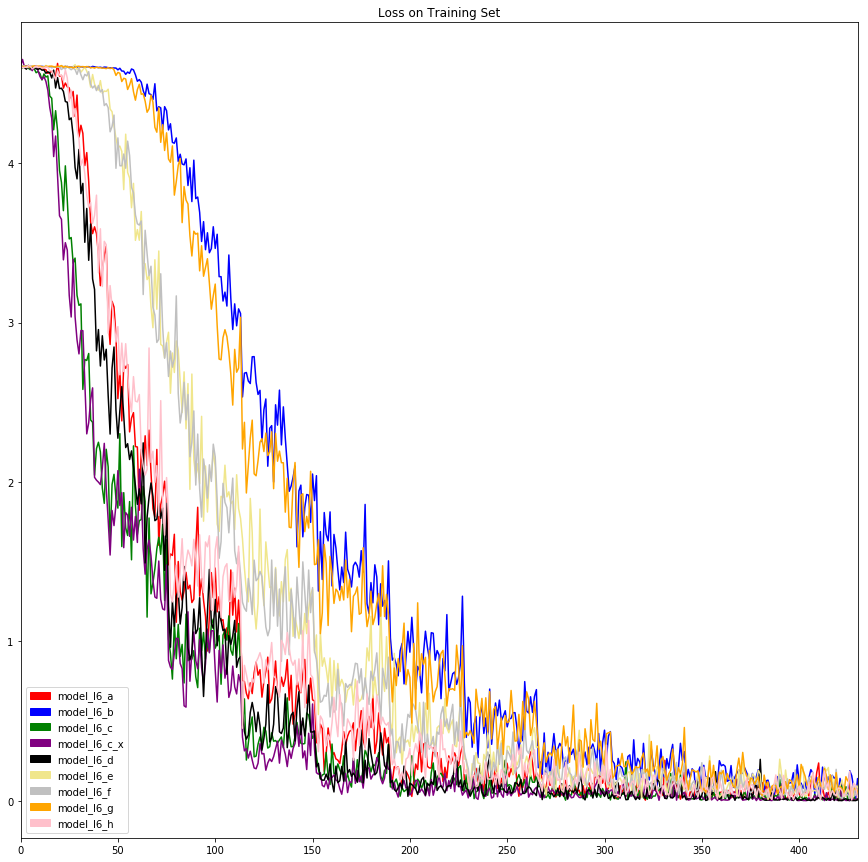

In [30]:
red_patch = mpatches.Patch(color='red', label='model_l6_a')
blue_patch = mpatches.Patch(color='blue', label='model_l6_b')
green_patch = mpatches.Patch(color='green', label='model_l6_c')
purple_patch = mpatches.Patch(color='purple', label='model_l6_c_x')
black_patch = mpatches.Patch(color='black', label='model_l6_d')
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_e')
silver_patch = mpatches.Patch(color='silver', label='model_l6_f')
orange_patch = mpatches.Patch(color='orange', label='model_l6_g')
pink_patch = mpatches.Patch(color='pink', label='model_l6_h')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'lower left')
plt.title('Loss on Training Set')
plt.plot(model_l6_a.all_losses, 'red')
plt.plot(model_l6_b.all_losses, 'blue')
plt.plot(model_l6_c.all_losses, 'green')
plt.plot(model_l6_c_x.all_losses, 'purple')
plt.plot(model_l6_d.all_losses, 'black')
plt.plot(model_l6_e.all_losses, 'khaki')
plt.plot(model_l6_f.all_losses, 'silver')
plt.plot(model_l6_g.all_losses, 'orange')
plt.plot(model_l6_h.all_losses, 'pink')

plt.xlim(0,430)
plt.show()

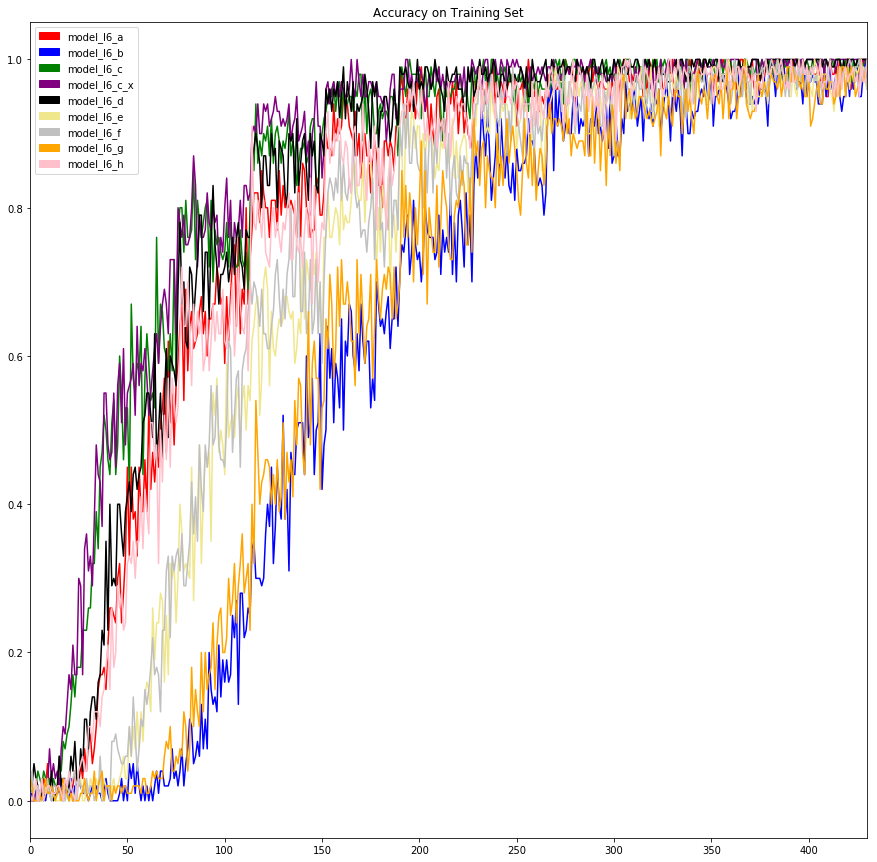

In [32]:
red_patch = mpatches.Patch(color='red', label='model_l6_a')
blue_patch = mpatches.Patch(color='blue', label='model_l6_b')
green_patch = mpatches.Patch(color='green', label='model_l6_c')
purple_patch = mpatches.Patch(color='purple', label='model_l6_c_x')
black_patch = mpatches.Patch(color='black', label='model_l6_d')
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_e')
silver_patch = mpatches.Patch(color='silver', label='model_l6_f')
orange_patch = mpatches.Patch(color='orange', label='model_l6_g')
pink_patch = mpatches.Patch(color='pink', label='model_l6_h')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'upper left')
plt.title('Accuracy on Training Set')
plt.plot(model_l6_a.all_accuracy, 'red')
plt.plot(model_l6_b.all_accuracy, 'blue')
plt.plot(model_l6_c.all_accuracy, 'green')
plt.plot(model_l6_c_x.all_accuracy, 'purple')
plt.plot(model_l6_d.all_accuracy, 'black')
plt.plot(model_l6_e.all_accuracy, 'khaki')
plt.plot(model_l6_f.all_accuracy, 'silver')
plt.plot(model_l6_g.all_accuracy, 'orange')
plt.plot(model_l6_h.all_accuracy, 'pink')

plt.xlim(0,430)
plt.show()